In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('./Times.csv').fillna(0)

WL = [0] * len(data)
ratio = [0] * len(data)

data['Ratio'] = ratio
data['Result'] = WL

dic = data.to_dict('index')

for i in dic:
  dic[i]['Ratio'] = dic[i]['Win'] - dic[i]['Loss']
  if dic[i]['Ratio'] > 0:
    dic[i]['Result'] = '1'
  elif dic[i]['Ratio'] < 0:
    dic[i]['Result'] = '0'
  else:
    dic[i]['Result'] = '0.5'
  
data = pd.DataFrame.from_dict(dic, orient='index', columns=['yearID', 'teamName', 'Win', 'Loss', 'Result'])

In [ ]:
data.head(100).sort_values(by=['teamName', 'yearID'])


,yearID,teamName,Win,Loss,Result
64,1954,Baltimore Orioles,54,100,0
80,1955,Baltimore Orioles,57,97,0
96,1956,Baltimore Orioles,69,85,0
2,1950,Boston Braves,83,71,1
18,1951,Boston Braves,76,78,0
...,...,...,...,...,...
31,1951,Washington Senators,62,92,0
47,1952,Washington Senators,78,76,1
63,1953,Washington Senators,76,76,0.5
79,1954,Washington Senators,66,88,0


In [ ]:
data['Result'].value_counts()

1      579
0      562
0.5     31
Name: Result, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data.drop(columns= 'teamName')
y = data['Result']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.5,
                                                    random_state = 42)

model = LogisticRegression(max_iter=1200)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
y_pred

array(['0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0.5',
       '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '0.5', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0'

In [ ]:
y_test

626     0
220     0
678     1
930     1
174     1
       ..
326     1
1035    0
499     0
888     1
876     0
Name: Result, Length: 586, dtype: object

In [ ]:
pd.DataFrame({
    'pred': y_pred,
    'resp': y_test
})

,pred,resp
626,0,0
220,0,0
678,1,1
930,1,1
174,1,1
...,...,...
326,1,1
1035,0,0
499,0,0
888,1,1


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [ ]:
y_test.value_counts()

1      295
0      275
0.5     16
Name: Result, dtype: int64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
         0.5       1.00      1.00      1.00        16
           1       1.00      1.00      1.00       295

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



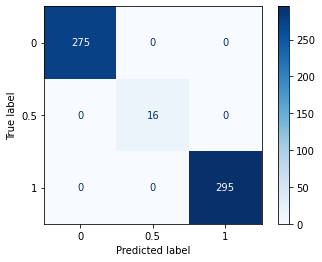

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, x_test, y_test, cmap='Blues', values_format='.0f')
print(classification_report(y_test, y_pred))